# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [75]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

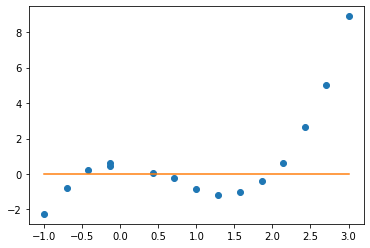

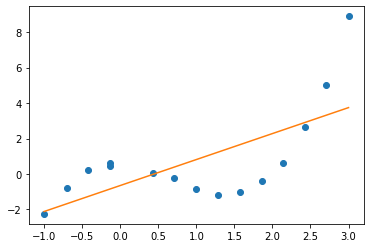

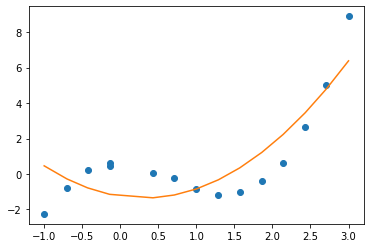

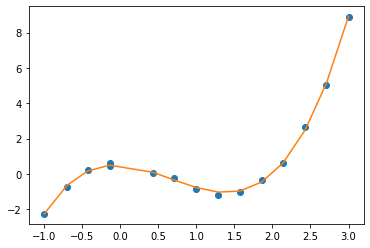

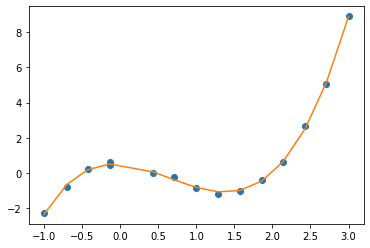

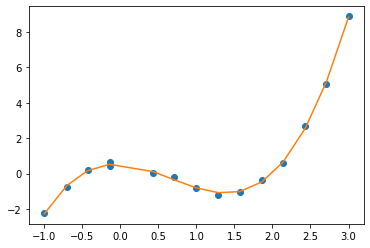

In [76]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array(x)
y = np.array(y)
def psy(x, y, m):
    a = np.ones_like(x)
    for i in range(1, m + 1):
        a = np.vstack((a, x**i)) # создадим design matrix
    a = a.T # создадим design matrix
    beta = np.linalg.inv(a.T @ a) @ a.T @ y #по логичной формуле из вики найдем коэфициент
    return beta
m = 0
while m < 6:
    if m == 0:
        plt.plot(x, y, 'o')
        w = np.zeros(len(x))
        plt.plot(x, w)
        m += 1
    a = psy(x, y, m)
    plt.figure()
    plt.plot(x, y, 'o')
    plt.plot(x, sum(a[i] * x**i for i in range(len(a)))) # полином
    m +=1

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [77]:
#просто реализуем формулу
m = 0
n = len(x)
sigmaold = 10000000
sigmanew = 10000000
while sigmanew - sigmaold <= 0 and m < n:
    m +=1
    a = psy(x, y, m)
    sigmaold = sigmanew
    sigmanew = sum((sum(a[i] * x[k]**i for i in range(len(a))) - y[k])**2 for k in range(n))/(n - m)
print(m)

5


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

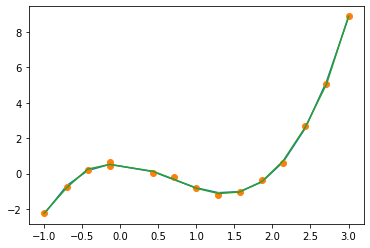

In [78]:
m = 5
a = psy(x, y, m)
plt.plot(x, sum(a[i] * x**i for i in range(len(a))))
plt.plot(x, y, 'o')
m = 10
a = psy(x, y, m)
plt.plot(x, sum(a[i] * x**i for i in range(len(a))))

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

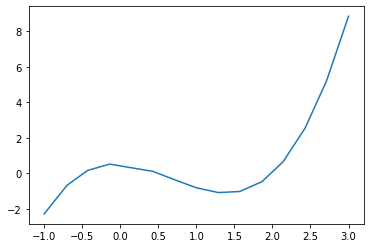

In [79]:
m = 5
def psu(x,m):
    a = np.ones_like(x)
    for i in range(1, m + 1):
        a = np.vstack((a, x**i))
    a = a.T
    return a
# согласно курсере
x0 = np.linspace(-1, 3, 100)
Q, R = np.linalg.qr(psu(x,m)) # разлоижили нашу design matrix по QR
y = Q.T @ y #повернули
betaQR = np.linalg.inv(R) @ y[:(m + 1)] #нашли бетту взяв m (+1 чтоб ) строк
plt.plot(x, sum(betaQR[i] * x**i for i in range(len(betaQR))))





# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

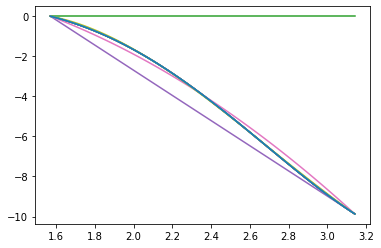

In [80]:
def lag(x, y, z):
    x = np.array(x)
    y = np.array(y)
    pf = 1
    l = 0
    for i in range(len(y)): #вычисляем базисные полиномы лагранжа
        p1 = 1
        p2 = 1
        for j in range(len(x)):
            if i != j:
                p1 *= (z - x[j])
                p2 *= (x[i] - x[j])
                pf = p1 / p2
        l += y[i] * pf # вычисляем сам полином
    return l

def f(x):
    return x**2 * np.cos(x)

xabs = np.linspace(np.pi/2, np.pi, 100)
plt.plot(xabs, f(xabs), '--')

for m in range(1, 6):   
    xm = np.linspace(np.pi/2, np.pi, m)
    plt.plot(xabs, f(xabs))
    y = [f(x) for x in xm]  
    plt.plot(xabs, [lag(xm, y, z) for z in xabs])

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

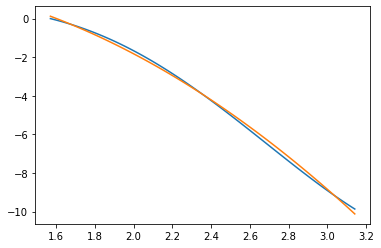

In [81]:
m = 3
xm = []
for k in range(1, m + 1):
    xm.append(np.pi * 3 / 4 + np.pi / 4 * (np.cos((2 * k - 1) * np.pi / (2 * m))))# применим аффинное преобраование
plt.plot(xabs, f(xabs))
y = [f(x) for x in xm]  
plt.plot(xabs, [lag(xm, y, z) for z in xabs])